# Insurance Claim Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* Determine the likelihood of claims for approximately 1,200 daily applications to better manage reserves and filter unsuitable applications, ensuring predictions are integrated into the business process before policy binding within a two-week cooling-off period.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if insurance get claim or not based on the given dataset.

## 2) Data Collection.
* The data consists of 10000 Rows and 41 Columns

### 2.1 Import Data and Required Packages

In [19]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# from sklearn.metrics import cohen_kappa_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, confusion_matrix, log_loss, roc_curve
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)

#Seed
np.random.seed(1889)

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv(r"insurance.csv")

**Show Top 5 Records**

In [3]:
df.head()

,claim_status,age,height_cm,weight_kg,income,financial_hist_1,financial_hist_2,financial_hist_3,financial_hist_4,credit_score_1,...,product_var_2,product_var_3,product_var_4,health_status,driving_record,previous_claim_rate,education_level,income level,n_dependents,employment_type
0,0,49,182,80,155292,1.408797,-0.573517,-0.464914,3.249624,519,...,1,B,1,1,3,1,5,3,3,NaN
1,0,55,185,86,169232,2.402368,1.135213,0.780797,3.075214,500,...,1,C,1,4,3,3,6,3,4,NaN
2,0,55,169,82,173856,-1.182139,0.337877,1.754185,1.932426,422,...,1,B,1,3,3,2,3,3,4,NaN
3,0,43,179,76,150264,1.107481,-1.123652,1.966727,-0.130857,297,...,0,C,1,4,3,1,4,3,4,NaN
4,0,56,167,86,118449,-0.985055,-0.604696,-0.650367,-1.329931,440,...,0,B,1,1,3,3,4,2,5,NaN


**Shape of the dataset**

In [4]:
df.shape

(10000, 41)

**Summary of the dataset**

In [5]:
# Display summary statistics for a dataframe
df.describe()

,claim_status,age,height_cm,weight_kg,income,financial_hist_1,financial_hist_2,financial_hist_3,financial_hist_4,credit_score_1,...,product_var_1,product_var_2,product_var_4,health_status,driving_record,previous_claim_rate,education_level,income level,n_dependents,employment_type
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3055.000000
mean,0.160300,55.039300,173.505900,83.356200,132872.011200,-1.023891,-0.003358,0.025945,-0.205794,509.915400,...,0.375900,0.548900,0.757200,2.51170,2.499800,2.012300,2.974200,2.158600,2.458900,0.509329
std,0.366902,11.400419,9.493333,10.164578,27549.069678,1.839791,1.002904,1.914435,1.749407,131.398632,...,0.484379,0.497628,0.428797,1.11937,1.122464,1.126621,2.010955,0.594543,1.163893,0.499995
min,0.000000,18.000000,140.000000,44.000000,0.000000,-8.583399,-4.104262,-6.548560,-7.145413,0.000000,...,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,47.000000,167.000000,77.000000,115272.250000,-2.199278,-0.682141,-1.337211,-1.404103,422.000000,...,0.000000,0.000000,1.000000,2.00000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,0.000000,56.000000,174.000000,83.000000,131053.000000,-1.077485,0.000427,0.036578,-0.695804,504.000000,...,0.000000,1.000000,1.000000,3.00000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000
75%,0.000000,63.000000,180.000000,90.000000,149238.250000,0.063002,0.663915,1.385526,0.864790,592.000000,...,1.000000,1.000000,1.000000,4.00000,4.000000,3.000000,5.000000,2.000000,3.000000,1.000000
max,1.000000,95.000000,210.000000,125.000000,249999.000000,6.416568,4.167967,6.851550,8.092358,999.000000,...,1.000000,1.000000,1.000000,4.00000,4.000000,5.000000,6.000000,4.000000,5.000000,1.000000


**Check Datatypes in the dataset**

In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_status             10000 non-null  int64  
 1   age                      10000 non-null  int64  
 2   height_cm                10000 non-null  int64  
 3   weight_kg                10000 non-null  int64  
 4   income                   10000 non-null  int64  
 5   financial_hist_1         10000 non-null  float64
 6   financial_hist_2         10000 non-null  float64
 7   financial_hist_3         10000 non-null  float64
 8   financial_hist_4         10000 non-null  float64
 9   credit_score_1           10000 non-null  int64  
 10  credit_score_2           10000 non-null  int64  
 11  credit_score_3           10000 non-null  int64  
 12  insurance_hist_1         10000 non-null  float64
 13  insurance_hist_2         10000 non-null  float64
 14  insurance_hist_3       

## 3. EXPLORING DATA

In [7]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 37 numerical features : ['claim_status', 'age', 'height_cm', 'weight_kg', 'income', 'financial_hist_1', 'financial_hist_2', 'financial_hist_3', 'financial_hist_4', 'credit_score_1', 'credit_score_2', 'credit_score_3', 'insurance_hist_1', 'insurance_hist_2', 'insurance_hist_3', 'insurance_hist_4', 'insurance_hist_5', 'bmi', 'gender', 'prev_claim_rejected', 'known_health_conditions', 'uk_residence', 'family_history_1', 'family_history_2', 'family_history_3', 'family_history_4', 'family_history_5', 'product_var_1', 'product_var_2', 'product_var_4', 'health_status', 'driving_record', 'previous_claim_rate', 'education_level', 'income level', 'n_dependents', 'employment_type']

We have 4 categorical features : ['marital_status', 'occupation', 'location', 'product_var_3']


In [8]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

marital_status
D    25.06
A    20.52
F    15.32
E    14.68
B    14.56
C     9.86
Name: proportion, dtype: float64
---------------------------
occupation
F    14.92
G    14.38
B    14.38
C    14.22
D    14.09
E    14.08
A    13.93
Name: proportion, dtype: float64
---------------------------
location
J    4.19
Z    4.15
P    4.14
Q    4.11
H    4.10
T    4.08
D    4.03
X    4.00
G    3.98
F    3.97
I    3.95
A    3.93
S    3.93
N    3.88
M    3.78
B    3.78
V    3.69
R    3.68
U    3.66
K    3.65
E    3.63
C    3.59
Y    3.59
W    3.57
L    3.53
O    3.41
Name: proportion, dtype: float64
---------------------------
product_var_3
C    30.59
B    27.95
A    23.05
D    18.41
Name: proportion, dtype: float64
---------------------------


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

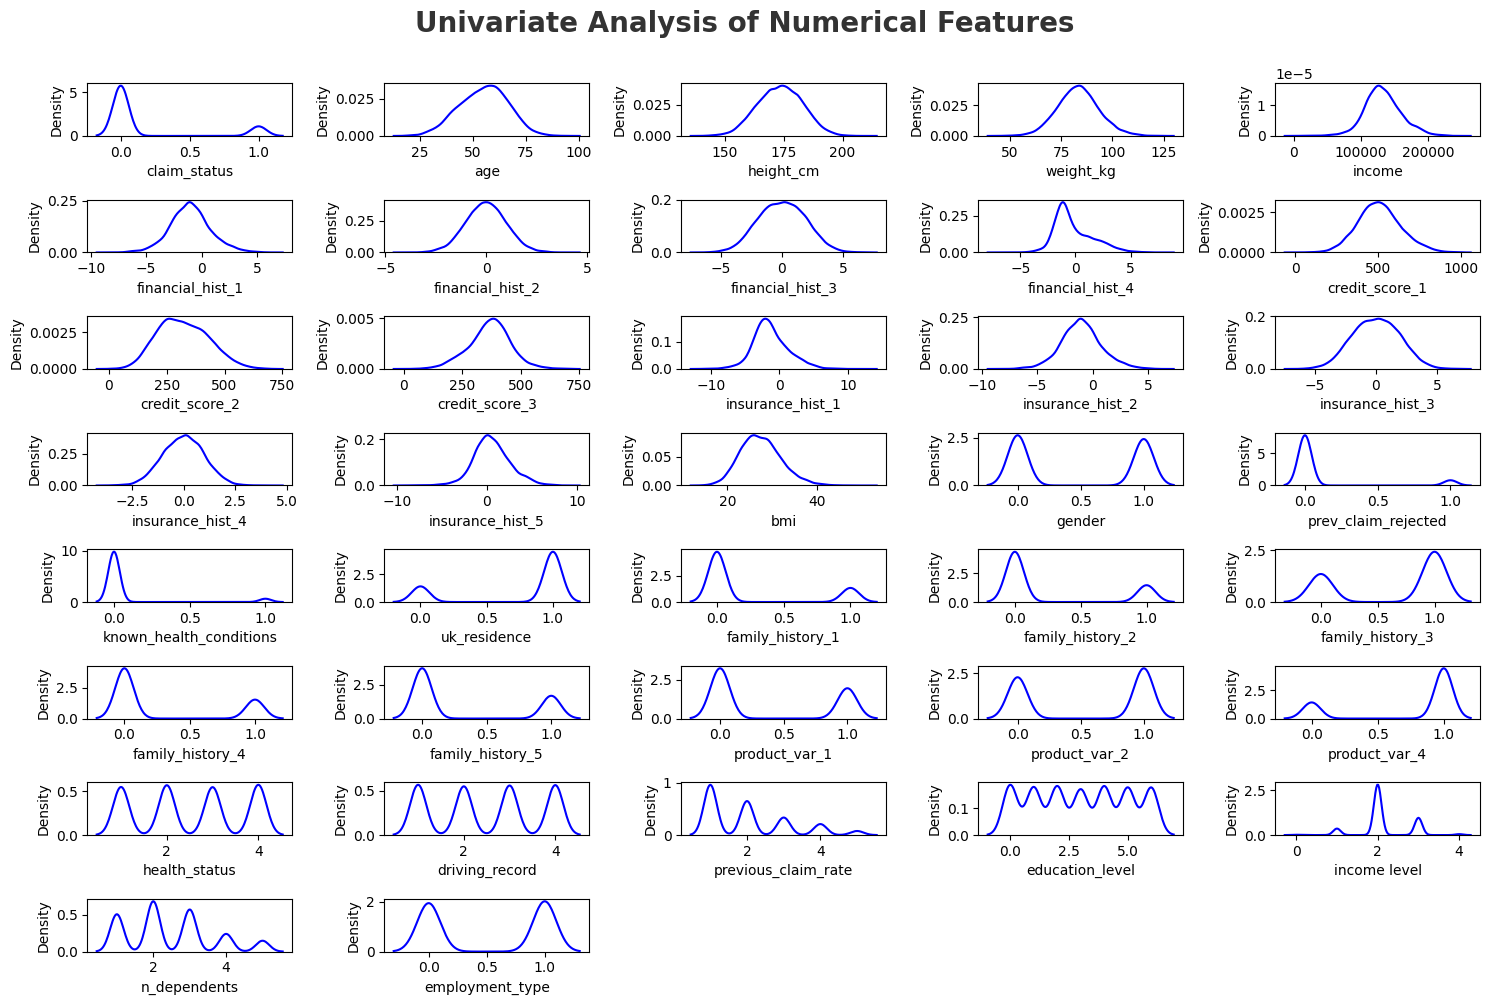

In [9]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(8, 5, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Categorical Features

In [10]:
categorical_features

['marital_status', 'occupation', 'location', 'product_var_3']

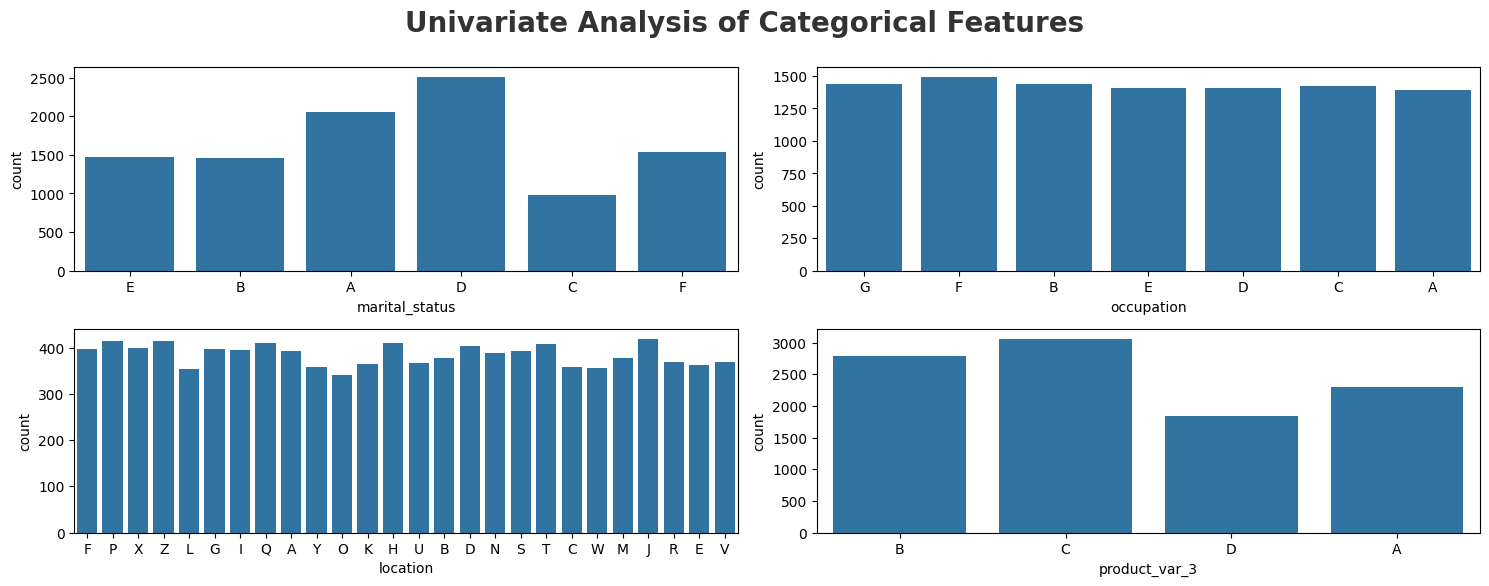

In [11]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

**Insights**
 - `occupation`, `location` coulmns are balanced and `marital_status`, `product_var_3` both columns have little dominatingare balanced.

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

In [12]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 20 discrete features : ['claim_status', 'gender', 'prev_claim_rejected', 'known_health_conditions', 'uk_residence', 'family_history_1', 'family_history_2', 'family_history_3', 'family_history_4', 'family_history_5', 'product_var_1', 'product_var_2', 'product_var_4', 'health_status', 'driving_record', 'previous_claim_rate', 'education_level', 'income level', 'n_dependents', 'employment_type']

We have 17 continuous_features : ['age', 'height_cm', 'weight_kg', 'income', 'financial_hist_1', 'financial_hist_2', 'financial_hist_3', 'financial_hist_4', 'credit_score_1', 'credit_score_2', 'credit_score_3', 'insurance_hist_1', 'insurance_hist_2', 'insurance_hist_3', 'insurance_hist_4', 'insurance_hist_5', 'bmi']


### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e claim_status**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [15]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['claim_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,marital_status,Fail to Reject Null Hypothesis
1,occupation,Fail to Reject Null Hypothesis
2,location,Fail to Reject Null Hypothesis
3,product_var_3,Fail to Reject Null Hypothesis


**Report** 
* Here `marital_status`, `occupation`, `location`, `product_var_3` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

### Checking Null Values

In [16]:
df.isnull().sum()

claim_status                  0
age                           0
height_cm                     0
weight_kg                     0
income                        0
financial_hist_1              0
financial_hist_2              0
financial_hist_3              0
financial_hist_4              0
credit_score_1                0
credit_score_2                0
credit_score_3                0
insurance_hist_1              0
insurance_hist_2              0
insurance_hist_3              0
insurance_hist_4              0
insurance_hist_5              0
bmi                           0
gender                        0
marital_status                0
occupation                    0
location                      0
prev_claim_rejected           0
known_health_conditions       0
uk_residence                  0
family_history_1              0
family_history_2              0
family_history_3           8108
family_history_4              0
family_history_5              0
product_var_1                 0
product_

**Report** 
* Here `family_history_3`, `employment_type` both features having a lot of null values which means it doesn't useful for Prediction.

## 4. Visualization

### 4.1 Visualize the Target Feature

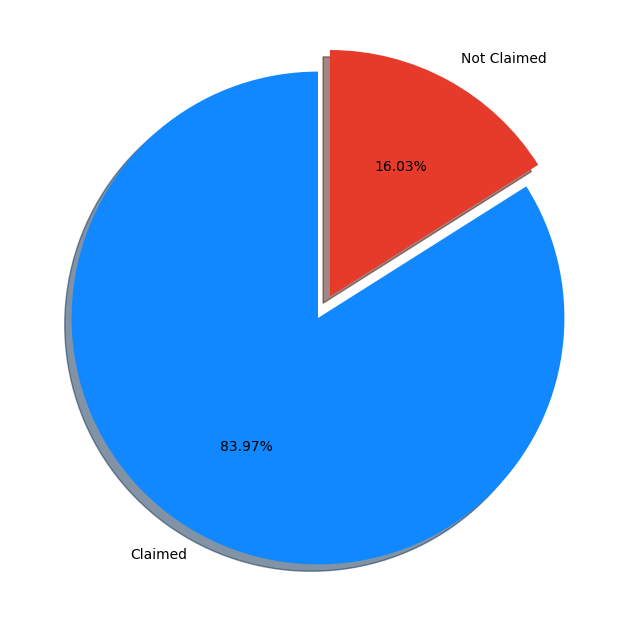

In [17]:
percentage = df.claim_status.value_counts(normalize=True)*100
labels = ["Claimed","Not Claimed"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

* From the chart it is seen that the Target Variable is Imbalanced
**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here 'Claimed' value has more count than the Certified value of the dataset.

### Final Report 
* `family_history_3`, `employment_type`columns can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* Target column `claim_status` is imbalanced can be handled before model building.

In [18]:
########################-------------Feature Engineering and Model Training------------###########################

# 5. Data Pre-Processing

## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### 5.1 Check Null Values

In [20]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

family_history_3 81.08 % missing values
employment_type 69.45 % missing values


**Report** 
* Here `family_history_3`, `employment_type` both features having a lot of null values in the dataset.

### 5.2 Other Data Cleaning steps

**Handling Duplicates**

In [21]:
df.duplicated().sum()

0

* **No Duplicates in the dataset**

**Remove Features**

In [22]:
df.drop(columns=["product_var_3", "marital_status", "occupation", "location","family_history_3","employment_type"], inplace=True, axis=1)

**Report**
* Here `marital_status`, `occupation`, `location`, `product_var_3` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.
* Here `family_history_3`, `employment_type` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

# 6. Feature Engineering

## Feature Extraction

In [23]:
df.head()

,claim_status,age,height_cm,weight_kg,income,financial_hist_1,financial_hist_2,financial_hist_3,financial_hist_4,credit_score_1,credit_score_2,credit_score_3,insurance_hist_1,insurance_hist_2,insurance_hist_3,insurance_hist_4,insurance_hist_5,bmi,gender,prev_claim_rejected,known_health_conditions,uk_residence,family_history_1,family_history_2,family_history_4,family_history_5,product_var_1,product_var_2,product_var_4,health_status,driving_record,previous_claim_rate,education_level,income level,n_dependents
0,0,49,182,80,155292,1.408797,-0.573517,-0.464914,3.249624,519,216,259,2.753861,1.408797,-0.464914,1.783368,2.252154,24,0,0,0,1,0,0,0,0,0,1,1,1,3,1,5,3,3
1,0,55,185,86,169232,2.402368,1.135213,0.780797,3.075214,500,264,226,2.192865,2.402368,0.780797,-0.863512,3.295261,25,1,0,0,1,0,1,0,0,0,1,1,4,3,3,6,3,4
2,0,55,169,82,173856,-1.182139,0.337877,1.754185,1.932426,422,240,417,-2.597654,-1.182139,1.754185,-1.356670,3.641282,28,1,0,0,1,0,0,0,0,1,1,1,3,3,2,3,3,4
3,0,43,179,76,150264,1.107481,-1.123652,1.966727,-0.130857,297,195,364,-0.834488,1.107481,1.966727,0.062683,1.875967,23,0,0,0,1,0,0,0,0,1,0,1,4,3,1,4,3,4
4,0,56,167,86,118449,-0.985055,-0.604696,-0.650367,-1.329931,440,366,411,-2.465348,-0.985055,-0.650367,-1.712912,-0.504719,30,0,0,0,0,0,1,0,0,1,0,1,1,3,3,4,2,5


### Type of Features

**Numeric Features**

In [24]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 35


**Categorical Features**

In [25]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 0


**Discrete features**

In [26]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 18


**Continues Features**

In [27]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 17


**Corrleation**

<Axes: >

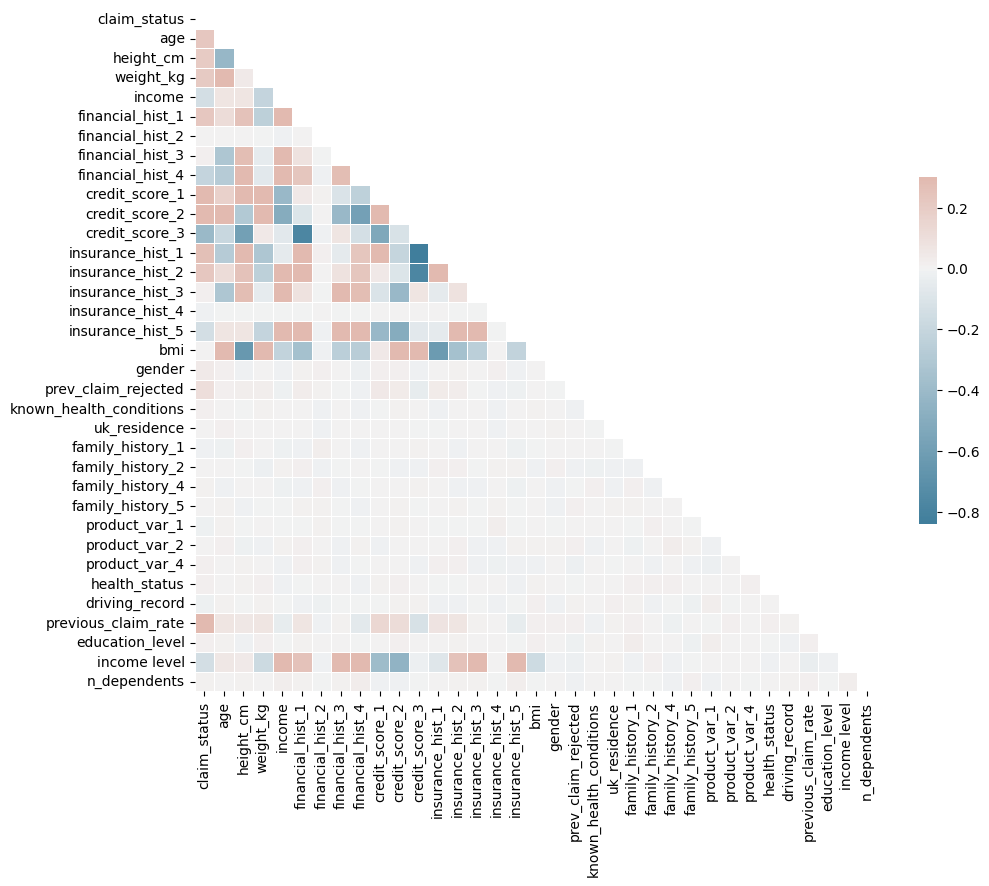

In [28]:
corr = df.corr()
diag_mask = np.triu(np.ones_like(corr, dtype=bool))

# Create axes and colourmap
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=diag_mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.**

In [29]:
X = df.drop('claim_status', axis=1)
y = df['claim_status']

# Classification Model

In [30]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Train Test Split

In [31]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((10550, 34), (2638, 34))

In [32]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [33]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [34]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [35]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [36]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9788
- F1 score: 0.9806
- Precision: 0.9806
- Recall: 0.9806
- Roc Auc Score: 0.9786


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9469
- F1 score: 0.9520
- Precision: 0.9449
- Recall: 0.9592
- Roc Auc Score: 0.9456


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9715
- F1 score: 0.9738
- Precision: 0.9795
- Recall: 0.9682
- Roc Auc Score: 0.9718
----------------------------------
Model performance for Test set
- Accuracy: 0.9644
- F1 score: 0.9675
- Precision: 0.9695
- Recall: 0.9654
- Roc Auc Score: 0.9643


Logistic Regression
Model performance for Training 

In [37]:
base_model_report

,Model Name,Accuracy
5,XGBClassifier,0.980667
0,Random Forest,0.978772
6,CatBoosting Classifier,0.977635
2,Gradient Boosting,0.964367
4,K-Neighbors Classifier,0.964367
1,Decision Tree,0.946929
8,AdaBoost Classifier,0.946929
3,Logistic Regression,0.905610
7,Support Vector Classifier,0.566338


**Here we can use Random Forest and XgBoost for Hyper Parameter Tuning**

**Define the parameter distribution for Random forest**

In [38]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}


In [39]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
    ('XGBoost', XGBClassifier(), xgboost_params)    
]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [40]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': None}
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 7}


In [41]:
model_param

{'RF': {'n_estimators': 100, 'max_features': 'log2', 'max_depth': None},
 'XGBoost': {'min_child_weight': 1, 'max_depth': 7}}

## Retraining the Model with best Parameters

In [42]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1)
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9788
- F1 score: 0.9806
- Precision: 0.9813
- Recall: 0.9800
- Roc Auc Score: 0.9786


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9814
- F1 score: 0.9831
- Precision: 0.9834
- Recall: 0.9827
- Roc Auc Score: 0.9813




In [43]:
tuned_report

,Model Name,Accuracy
1,XGBClassifier,0.981425
0,Random Forest Classifier,0.978772


In [44]:
best_model = XGBClassifier(**model_param['XGBoost'],n_jobs=-1)
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'XGBoostClassifier'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'XGBoostClassifier'
Accuracy Score value: 0.9814
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1191
           1       0.98      0.98      0.98      1447

    accuracy                           0.98      2638
   macro avg       0.98      0.98      0.98      2638
weighted avg       0.98      0.98      0.98      2638



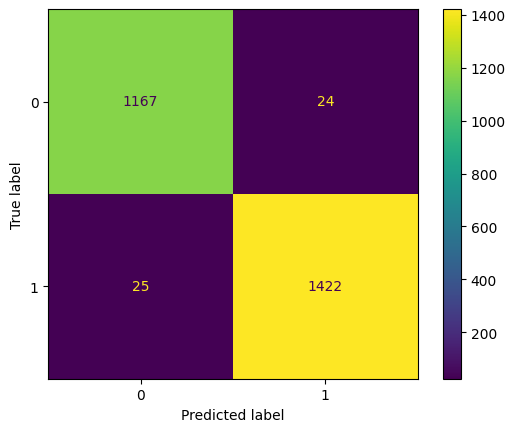

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is XGBoostClassifier with Accuracy 98%